In [5]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
X, y = make_blobs(n_samples = 100, centers = 3)

In [3]:
X.shape

(100, 2)

In [6]:
type(X)

numpy.ndarray

In [10]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [8]:
A = sns.load_dataset('iris')

In [9]:
A.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Regression

In [13]:
n = 100
X = np.arange(n)
y = 4*X + 3*(X**2) - 100

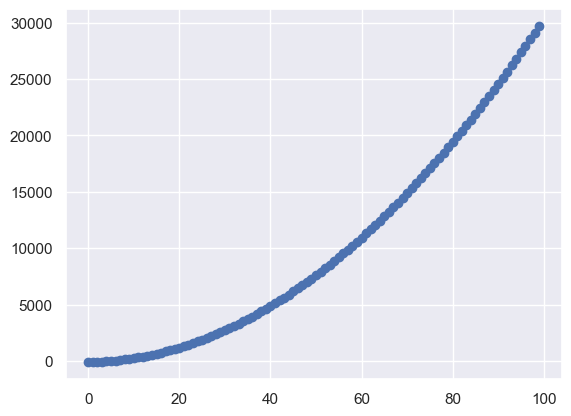

In [14]:
plt.scatter(X, y)

In [15]:
from sklearn.linear_model import LinearRegression

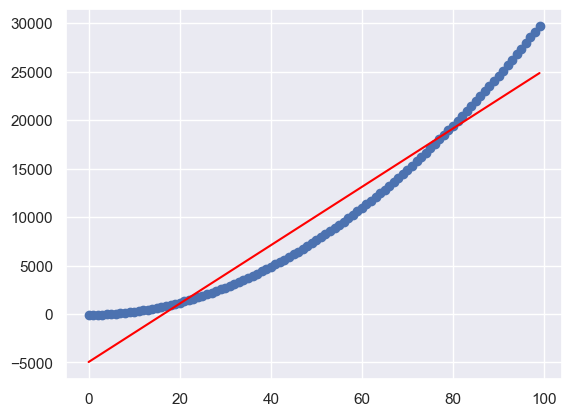

In [16]:
m = LinearRegression()
m.fit(X[:,np.newaxis],y)
y_pred = m.predict(X[:,np.newaxis])
plt.scatter(X,y)
plt.plot(X,y_pred, color='red')

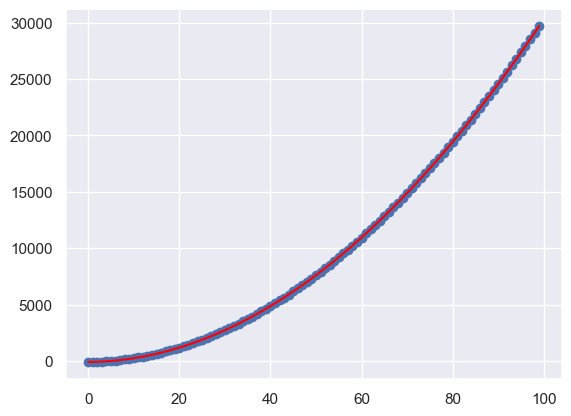

In [18]:
from sklearn.preprocessing import PolynomialFeatures
## Transform the linear feature to polynomial feature
pmodel = PolynomialFeatures(degree=2)
X_poly = pmodel.fit_transform(X[:,np.newaxis])
m = LinearRegression()
m.fit(X_poly,y)
y_pred = m.predict(X_poly)
plt.scatter(X,y)
plt.plot(X,y_pred, color='red')

In [19]:
m.coef_

array([0., 4., 3.])

## Classification

In [20]:
X = sns.load_dataset('iris')

In [21]:
X

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [24]:
y = X.species
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [25]:
X = X.drop(columns={'species'})
X.shape

(150, 4)

In [26]:
from sklearn.svm import SVC

In [27]:
cm = SVC(gamma='auto')
cm.fit(X,y)

SVC(gamma='auto')

In [28]:
y_pred = cm.predict(X)
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica

## Clustering

In [38]:
X,y = make_blobs(n_samples = 500, centers = 5, cluster_std = 0.6)
print(X.shape)
print(y.shape)

(500, 2)
(500,)


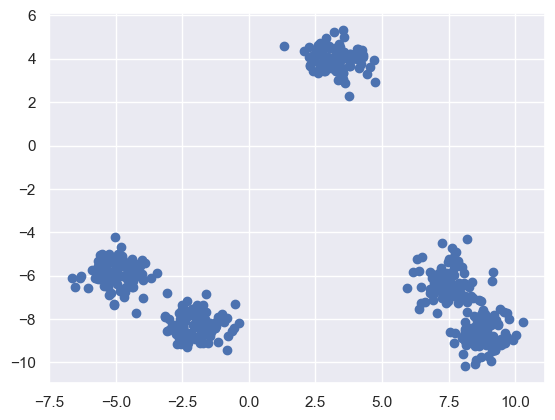

In [39]:
plt.scatter(X[:,0], X[:,1])

In [40]:
from sklearn.cluster import KMeans

In [42]:
kmeans = KMeans(n_clusters = 5)

In [43]:
kmeans.fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5)

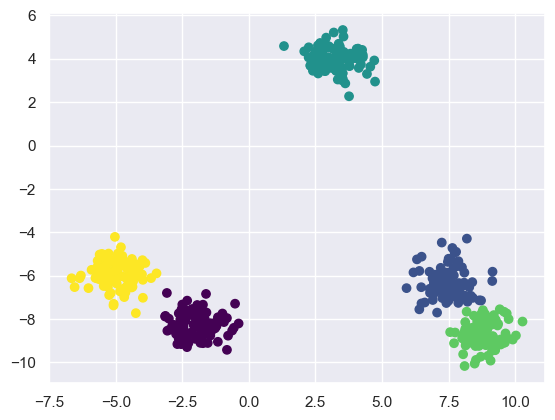

In [44]:
y_pred = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis')